In [ ]:
# Importing the necessary libraries
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# Importing the dataset from the sklearn library into a local variable called dataset
dataset = load_digits()

# Splitting the data test into train 70% and test 30%.
# x_train, y_train are training data and labels respectively
# x_test, y_test are testing data and labels respectively
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.30, random_state=4)

# Making the SVM Classifer
Classifier = SVC(kernel="linear")

# Training the model on the training data and labels
Classifier.fit(x_train, y_train)

# Using the model to predict the labels of the test data
y_pred = Classifier.predict(x_test)

# Evaluating the accuracy of the model using the sklearn functions
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

# Printing the results
print("Accuracy for SVM is:",accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy for SVM is: 97.96296296296296
Confusion Matrix
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  1  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  1  0  0  0  0]
 [ 0  1  0  0 53  0  0  0  0  0]
 [ 0  0  0  0  0 57  0  0  0  1]
 [ 0  0  0  0  0  0 51  0  1  0]
 [ 0  0  0  0  0  0  0 54  1  0]
 [ 0  4  0  0  0  0  0  0 51  0]
 [ 0  0  0  0  0  0  0  0  1 52]]


+---------+-----+--------------+
|  Kernel |  C  | Avg accuracy |
+---------+-----+--------------+
|  linear | 0.5 |    0.796     |
|  linear | 1.0 |    0.796     |
|  linear | 1.5 |    0.796     |
|  linear | 2.0 |    0.796     |
|  linear | 2.5 |    0.796     |
|   poly  | 0.5 |    0.808     |
|   poly  | 1.0 |    0.812     |
|   poly  | 1.5 |    0.812     |
|   poly  | 2.0 |    0.803     |
|   poly  | 2.5 |    0.799     |
|   rbf   | 0.5 |    0.815     |
|   rbf   | 1.0 |    0.831     |
|   rbf   | 1.5 |    0.833     |
|   rbf   | 2.0 |    0.838     |
|   rbf   | 2.5 |    0.838     |
| sigmoid | 0.5 |    0.757     |
| sigmoid | 1.0 |    0.749     |
| sigmoid | 1.5 |    0.749     |
| sigmoid | 2.0 |    0.742     |
| sigmoid | 2.5 |    0.733     |
+---------+-----+--------------+


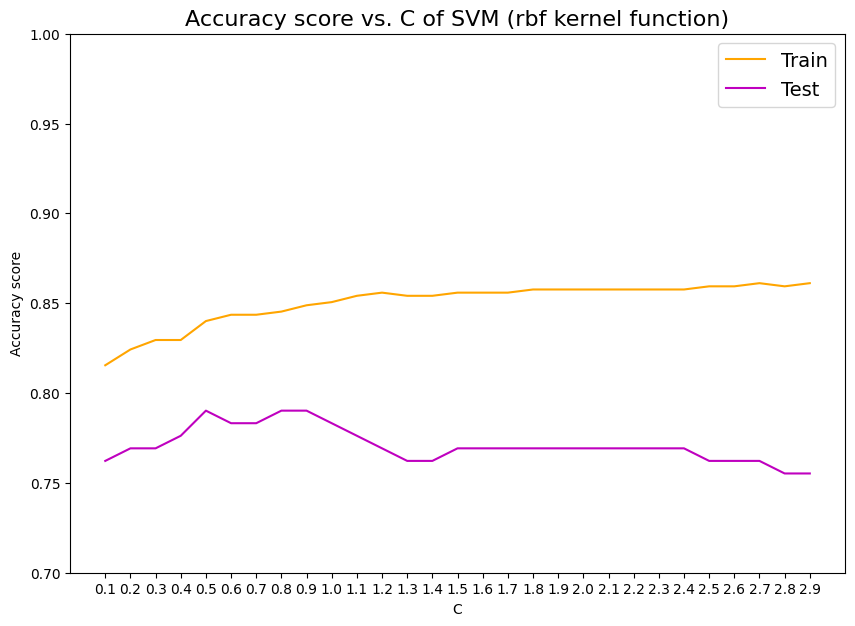

In [3]:
# Import packages
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from prettytable import PrettyTable
from sklearn.preprocessing import LabelEncoder

# Read data
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)

# Check missing values
data.isnull().sum()
# Drop columns with too many missing values
data.drop('Cabin', axis=1, inplace=True)
# Drop data with missing values
data.dropna(inplace=True)

# Inspect data
data.head()
# Transfrom attribute
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

# Decide variables to use
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']

# train/test split (80/20)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)

# Standardize
scalar = StandardScaler().fit(x_train)
x_train_transformed = scalar.transform(x_train)
x_test_transformed = scalar.transform(x_test)

# Cross validation for hyper-parameter tuning
hyperparameter_score_list = []
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    for c in np.arange(0.5,3,0.5):
        svm = SVC(kernel=kernel, C=c)
        scores = cross_validate(svm, x_train_transformed, y_train, cv=10, scoring='accuracy')
        mean_score = np.mean(scores['test_score'])
        hyperparameter_score_list.append([kernel, c, mean_score])
# Choose the hyper-parameters (with highest average accuracy)
myTable = PrettyTable(["Kernel", "C", "Avg accuracy"])
for row in hyperparameter_score_list:
    myTable.add_row([row[0], row[1], round(row[2],3)])
print(myTable)

# Try different C
c_range = np.arange(0.1, 3, 0.1)
test_svm = []
train_svm = []
for c in c_range:
    svm_classifier = SVC(kernel='rbf', C=c)
    svm_classifier.fit(x_train_transformed, y_train)
    train_svm.append(svm_classifier.score(x_train_transformed, y_train))
    test_svm.append(svm_classifier.score(x_test_transformed, y_test))
# Line plot of training/testing score
fig = plt.figure(figsize=(10, 7))
plt.plot(c_range, train_svm, c='orange', label='Train')
plt.plot(c_range, test_svm, c='m', label='Test')
plt.xlabel('C')
plt.xticks(c_range)
plt.ylabel('Accuracy score')
plt.ylim(0.7, 1)
plt.legend(prop={'size': 14}, loc=1)
plt.title('Accuracy score vs. C of SVM (rbf kernel function)', size=16)
plt.show()